# Run SurvTRACE on GBSG dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os, sys
sys.path.append(os.path.abspath('../SurvTRACE'))

In [3]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'gbsg'

seed = STConfig['seed'] # 1234
#seed = 42

set_random_seed(seed)

hparams = {
    'batch_size': 64,
    'weight_decay': 0,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [4]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

use pytorch-cuda for training.
[Train-0]: 39.750836968421936
[Val-0]: 1.430763840675354
[Train-1]: 30.77250039577484
[Val-1]: 1.3748854398727417
[Train-2]: 27.913107752799988
[Val-2]: 1.3679455518722534
[Train-3]: 27.77131462097168
[Val-3]: 1.3514004945755005
[Train-4]: 27.594568848609924
[Val-4]: 1.3398962020874023
[Train-5]: 27.405004382133484
[Val-5]: 1.316502332687378
[Train-6]: 27.383405804634094
[Val-6]: 1.3220163583755493
EarlyStopping counter: 1 out of 5
[Train-7]: 27.330041527748108
[Val-7]: 1.3244298696517944
EarlyStopping counter: 2 out of 5
[Train-8]: 27.199955224990845
[Val-8]: 1.3601561784744263
EarlyStopping counter: 3 out of 5
[Train-9]: 27.118715286254883
[Val-9]: 1.3365825414657593
EarlyStopping counter: 4 out of 5
[Train-10]: 27.14840805530548
[Val-10]: 1.3214644193649292
EarlyStopping counter: 5 out of 5
early stops at epoch 11


In [5]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
C-td:  0.429652915891448
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7578260250232215
Brier Score: 0.10601060514974099
Dynamic AUC:  0.7739519097618426
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7088535170119311
Brier Score: 0.17988183507627967
Dynamic AUC:  0.7334135802439432
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6934510795477832
Brier Score: 0.21168381021711033
Dynamic AUC:  0.7324651856047422
done


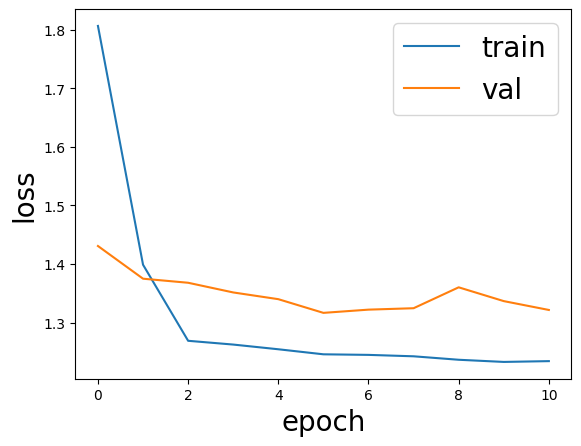

In [6]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()